In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [97]:
import lightgbm as lgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
%pwd

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85'

In [98]:
train_df = pd.read_csv('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/train_df.csv')

In [99]:
X = train_df[['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']]
Y = train_df['ICE_state']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [12]:
std = StandardScaler()
std.fit(x_train)
x_train_scaled = std.transform(x_train)
x_test_scaled = std.transform(x_test)

In [13]:
train_data = lgb.Dataset(x_train_scaled, label=y_train)
test_data = lgb.Dataset(x_test_scaled, label=y_test, reference=train_data)

In [14]:
params1 = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':'multi_logloss',
    'learning_rate':0.1,
    'max_depth':5,
    'num_leaves':31,
    'random_state':42
}

In [15]:
lgbm1 = lgb.train(params1, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used features: 9
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -2.698931
[LightGBM] [Info] Start training from score -0.916832
[LightGBM] [Info] Start training from score -0.629348
[1]	valid_0's multi_logloss: 0.797435
Training until validation scores don't improve for 10 

In [16]:
# 예측 및 평가
y_pred = lgbm1.predict(x_test_scaled, num_iteration=lgbm1.best_iteration)
y_pred = [np.argmax(line) for line in y_pred]
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [17]:
params2 = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':'multi_logloss',
    'learning_rate':0.1,
    'max_depth':7,
    'num_leaves':31,
    'random_state':42
}

In [18]:
lgbm2 = lgb.train(params2, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used featur

In [19]:
# 예측 및 평가
y_pred = lgbm2.predict(x_test_scaled, num_iteration=lgbm2.best_iteration)
y_pred = [np.argmax(line) for line in y_pred]
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


In [23]:
params3 = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':'multi_logloss',
    'learning_rate':0.1,
    'max_depth':10,
    'num_leaves':256,
    'random_state':42
}

In [24]:
lgbm3 = lgb.train(params3, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used features: 9
[LightGBM] [Info] Start training from score -2.698931
[LightGBM] [Info] Start training from score -0.916832
[LightGBM] [Info] Start training from score -0.629348
[1]	valid_0's multi_logloss: 0.779454
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.701331
[3]	valid_0's multi_logloss: 0.639355
[4]	valid_0's multi_logloss: 0.588621
[5]	valid

In [25]:
# 예측 및 평가
y_pred = lgbm3.predict(x_test_scaled, num_iteration=lgbm3.best_iteration)
y_pred = [np.argmax(line) for line in y_pred]
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [26]:
params4 = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':'multi_logloss',
    'learning_rate':0.1,
    'max_depth':15,
    'num_leaves':1024,
    'random_state':42
}

In [27]:
lgbm4 = lgb.train(params4, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used features: 9
[LightGBM] [Info] Start training from score -2.698931
[LightGBM] [Info] Start training from score -0.916832
[LightGBM] [Info] Start training from score -0.629348
[1]	valid_0's multi_logloss: 0.763411
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.676381
[3]	valid_0's multi_logloss: 0.607686
[4]	valid_0's multi_logloss: 0.552057
[5]	valid

In [28]:
# 예측 및 평가
y_pred = lgbm4.predict(x_test_scaled, num_iteration=lgbm4.best_iteration)
y_pred = [np.argmax(line) for line in y_pred]
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [29]:
params5 = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':'multi_logloss',
    'learning_rate':0.1,
    'max_depth':20,
    'num_leaves':2048,
    'random_state':42
}

In [30]:
lgbm5 = lgb.train(params5, train_data, num_boost_round=1000, valid_sets=[test_data], early_stopping_rounds=10)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used features: 9
[LightGBM] [Info] Start training from score -2.698931
[LightGBM] [Info] Start training from score -0.916832
[LightGBM] [Info] Start training from score -0.629348
[1]	valid_0's multi_logloss: 0.755484
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.664644
[3]	valid_0's multi_logloss: 0.593209
[4]	valid_0's multi_logloss: 0.535382
[5]	valid

In [31]:
# 예측 및 평가
y_pred = lgbm5.predict(x_test_scaled, num_iteration=lgbm5.best_iteration)
y_pred = [np.argmax(line) for line in y_pred]
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [32]:
# lgbm4
y_pred_lgbm4 = lgbm4.predict(x_test_scaled, num_iteration=lgbm4.best_iteration)
y_pred_lgbm4 = [np.argmax(line) for line in y_pred_lgbm4]
accuracy = accuracy_score(y_test,y_pred_lgbm4)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [33]:
precision = precision_score(y_test,y_pred_lgbm4,average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.93


In [34]:
recall = recall_score(y_test,y_pred_lgbm4,average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.91


In [35]:
f1 = f1_score(y_test,y_pred_lgbm4,average='macro')
print(f"f1 score: {f1:.2f}")

f1 score: 0.92


In [37]:
conf_matrix = confusion_matrix(y_test,y_pred_lgbm4)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 69157  19013    253]
 [ 11670 502473  12470]
 [   211  10696 693256]]


In [36]:
# lgbm5
y_pred_lgbm5 = lgbm5.predict(x_test_scaled, num_iteration=lgbm5.best_iteration)
y_pred_lgbm5 = [np.argmax(line) for line in y_pred_lgbm5]
accuracy = accuracy_score(y_test,y_pred_lgbm5)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [38]:
precision = precision_score(y_test,y_pred_lgbm5,average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.93


In [39]:
recall = recall_score(y_test,y_pred_lgbm5,average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.90


In [40]:
f1 = f1_score(y_test,y_pred_lgbm5,average='macro')
print(f"f1 score: {f1:.2f}")

f1 score: 0.91


In [41]:
conf_matrix = confusion_matrix(y_test,y_pred_lgbm5)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 68757  19383    283]
 [ 11701 501934  12978]
 [   212  10920 693031]]


In [42]:
# LGBM4를 best model로 선정

In [43]:
# 중요 특징 시각화
feature_importances = lgbm4.feature_importance()
features = ['GRID_X','GRID_Y','Year','Month','Day','Hour','WS','TA_C','HM']
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

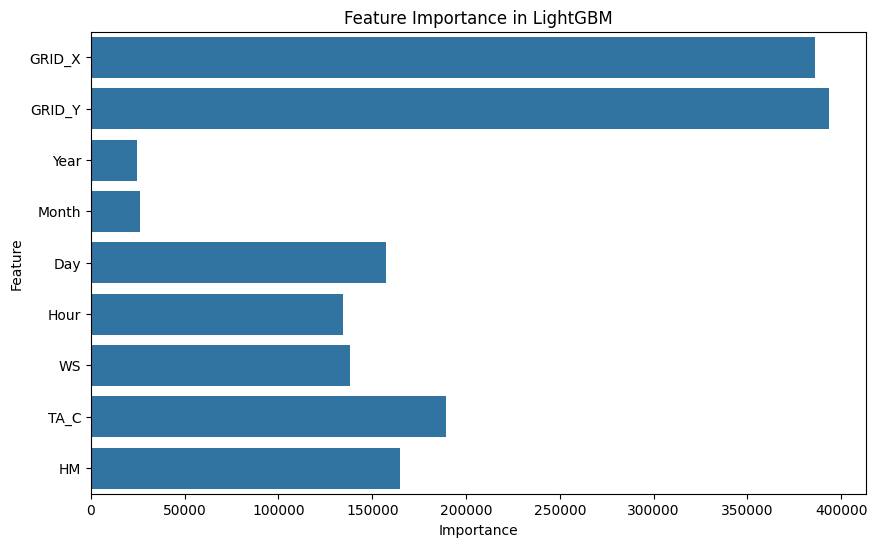

In [112]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importance_df)
plt.title('Feature Importance in LightGBM')
# plt.show()
plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/LGB_feature_importance.png')

In [46]:
import pickle
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/LGBM_model','wb') as f:
    pickle.dump(lgbm4,f)

In [48]:
params = {
    'max_iter':[500,1000,1500,2000],
    'max_depth':[5,10,15,20]
}

In [49]:
hgbc = HistGradientBoostingClassifier(learning_rate=0.1, random_state=42)

In [50]:
grid_cv = GridSearchCV(hgbc,param_grid=params,cv=2,n_jobs=2,verbose=2)
grid_cv.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END ..........................max_depth=5, max_iter=500; total time= 6.5min
[CV] END .........................max_depth=5, max_iter=1000; total time= 2.9min
[CV] END .........................max_depth=5, max_iter=1500; total time=10.2min
[CV] END .........................max_depth=5, max_iter=2000; total time= 2.9min
[CV] END .........................max_depth=10, max_iter=500; total time= 1.9min
[CV] END .........................max_depth=10, max_iter=500; total time= 1.5min
[CV] END ........................max_depth=10, max_iter=1000; total time= 2.0min
[CV] END ........................max_depth=10, max_iter=1500; total time= 1.5min
[CV] END ........................max_depth=10, max_iter=2000; total time= 2.0min
[CV] END .........................max_depth=15, max_iter=500; total time= 1.9min
[CV] END ........................max_depth=15, max_iter=1000; total time= 1.9min
[CV] END ........................max_depth=15, m

GridSearchCV(cv=2, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_iter': [500, 1000, 1500, 2000]},
             verbose=2)

In [51]:
grid_cv.best_estimator_

HistGradientBoostingClassifier(max_depth=5, max_iter=1000, random_state=42)

In [52]:
estimator = grid_cv.best_estimator_
pred = estimator.predict(x_test_scaled)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluation(y_test , pred):
    
    mae = mean_absolute_error(y_test,pred) ## mae
    mse = mean_squared_error(y_test,pred) # mse
    rmse = np.sqrt(mean_squared_error(y_test,pred)) # rmse

    print('mae: {}, mse: {}, rmse:{}'.format(mae, mse, rmse))

In [54]:
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
evaluation(y_test, pred)

최적 하이퍼 파라미터:
 {'max_depth': 5, 'max_iter': 1000}
최고 예측 정확도: 0.9074
mae: 0.08585133857742464, mse: 0.0890290244307341, rmse:0.29837731889460717


In [55]:
params = {
    'max_iter':[800,1000,1200],
    'max_depth':[4,5,6,7]
}

In [56]:
hgbc2 = HistGradientBoostingClassifier(learning_rate=0.1, random_state=42)

In [57]:
grid_cv2 = GridSearchCV(hgbc2,param_grid=params,cv=2,n_jobs=2,verbose=2)
grid_cv2.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..........................max_depth=4, max_iter=800; total time= 9.0min
[CV] END .........................max_depth=4, max_iter=1000; total time=11.1min
[CV] END .........................max_depth=4, max_iter=1200; total time=13.3min
[CV] END ..........................max_depth=5, max_iter=800; total time= 2.9min
[CV] END .........................max_depth=5, max_iter=1000; total time=10.2min
[CV] END .........................max_depth=5, max_iter=1200; total time= 2.9min
[CV] END ..........................max_depth=6, max_iter=800; total time= 3.9min
[CV] END ..........................max_depth=6, max_iter=800; total time= 5.8min
[CV] END .........................max_depth=6, max_iter=1200; total time= 3.9min
[CV] END .........................max_depth=6, max_iter=1200; total time= 5.8min
[CV] END .........................max_depth=7, max_iter=1000; total time= 2.4min
[CV] END .........................max_depth=7, m

GridSearchCV(cv=2, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_iter': [800, 1000, 1200]},
             verbose=2)

In [58]:
grid_cv2.best_estimator_

HistGradientBoostingClassifier(max_depth=6, max_iter=800, random_state=42)

In [59]:
estimator2 = grid_cv2.best_estimator_
pred2 = estimator2.predict(x_test_scaled)

In [60]:
print('최적 하이퍼 파라미터:\n',grid_cv2.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv2.best_score_))
evaluation(y_test, pred2)

최적 하이퍼 파라미터:
 {'max_depth': 6, 'max_iter': 800}
최고 예측 정확도: 0.9108
mae: 0.09570125507978705, mse: 0.09958391417822482, rmse:0.3155691907937542


In [61]:
precision = precision_score(y_test,pred2,average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.85


In [62]:
recall = recall_score(y_test,pred2,average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.78


In [63]:
f1 = f1_score(y_test,pred2,average='macro')
print(f"f1 score: {f1:.2f}")

f1 score: 0.81


In [64]:
conf_matrix = confusion_matrix(y_test,pred2)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 42164  44489   1770]
 [ 14722 477189  34702]
 [   791  27214 676158]]


In [79]:
# 최종모델
lgb_params = {
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':3,
    'metric':['multi_logloss', 'multi_error'],
    'learning_rate':0.1,
    'max_depth':15,
    'num_leaves':1024,
    'random_state':42
}

evals_result = {}

lgb_clf = lgb.train(lgb_params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data], valid_names=['train','valid'], early_stopping_rounds=10, evals_result=evals_result)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 5276793, number of used features: 9
[LightGBM] [Info] Start training from score -2.698931
[LightGBM] [Info] Start training from score -0.916832
[LightGBM] [Info] Start training from score -0.629348
[1]	train's multi_logloss: 0.763839	train's multi_error: 0.300596	valid's multi_logloss: 0.763411	valid's multi_error: 0.29994
Training until validation scores don't improve for 10 rounds
[2]	train's multi_logloss: 0.67654

In [80]:
# 학습 과정 중 기록된 로스와 정확도 값 추출
train_logloss = evals_result['train']['multi_logloss']
valid_logloss = evals_result['valid']['multi_logloss']
train_error = evals_result['train']['multi_error']
valid_error = evals_result['valid']['multi_error']

In [82]:
# 정확도는 1 - 오류율로 계산
train_accuracy = [1 - err for err in train_error]
valid_accuracy = [1 - err for err in valid_error]

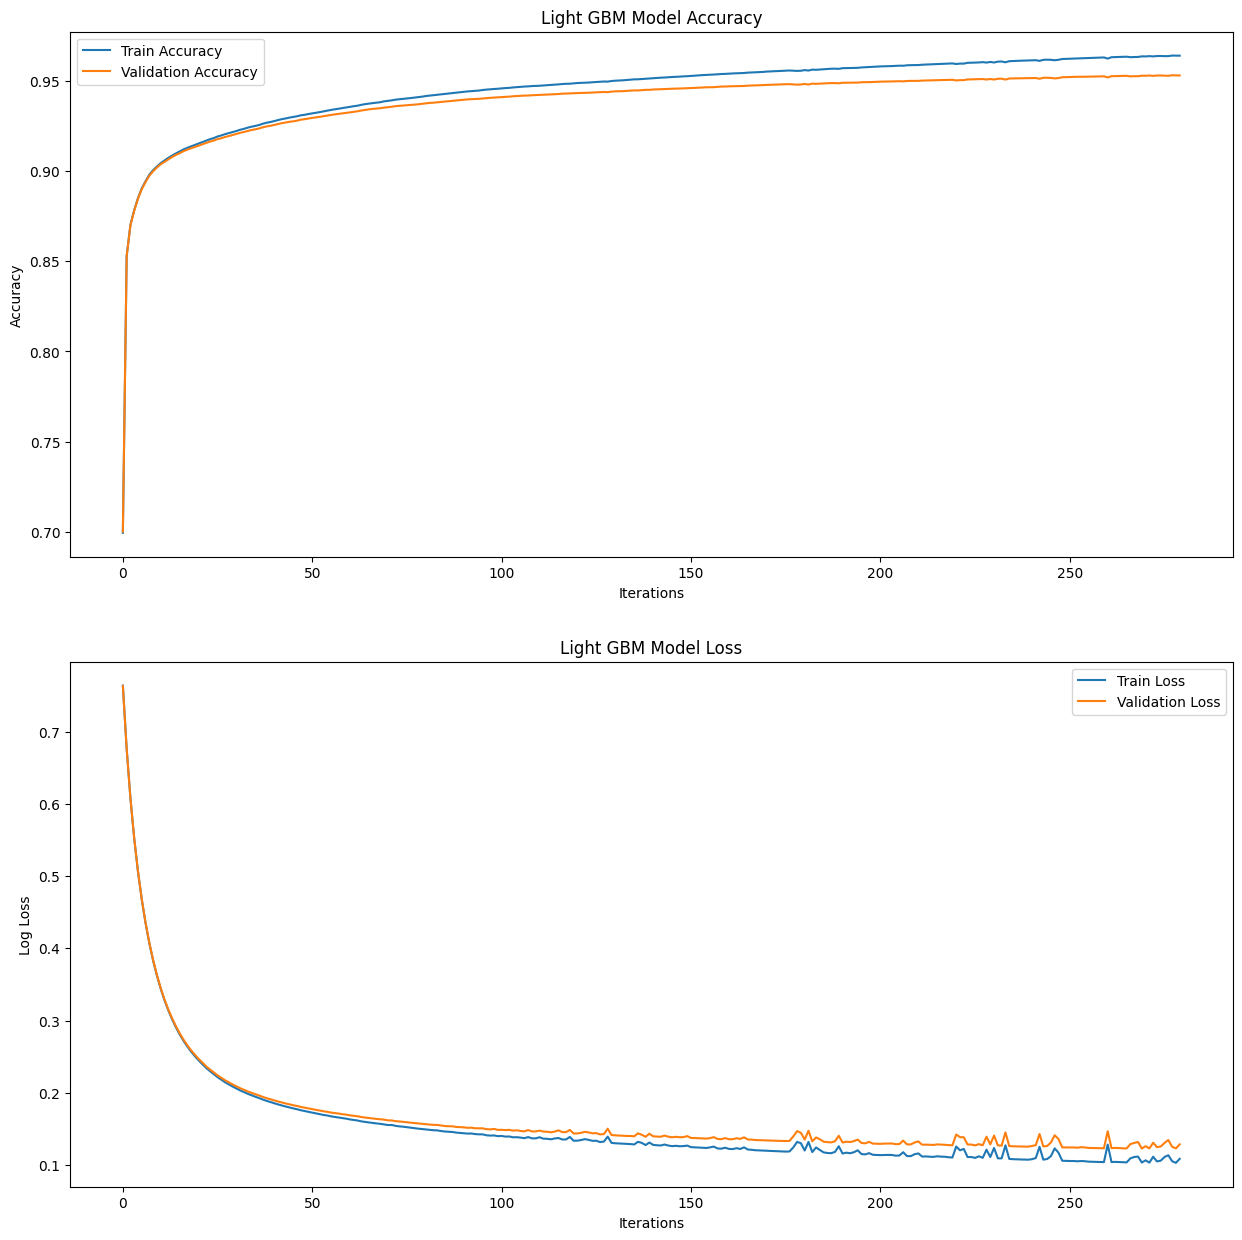

In [104]:
# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# Accuracy 그래프
ax1.plot(train_accuracy, label='Train Accuracy')
ax1.plot(valid_accuracy, label='Validation Accuracy')
ax1.set_title('Light GBM Model Accuracy')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss 그래프
ax2.plot(train_logloss, label='Train Loss')
ax2.plot(valid_logloss, label='Validation Loss')
ax2.set_title('Light GBM Model Loss')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Log Loss')
ax2.legend()

# plt.show()

plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/LGB_loss,accuracy.png')

In [89]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=3,
                    metric='multi_logloss', learning_rate=0.1, max_depth=15, num_leaves=1024, random_state=42)

In [90]:
lgbm.fit(x_train_scaled,y_train)

LGBMClassifier(max_depth=15, metric='multi_logloss', num_class=3,
               num_leaves=1024, objective='multiclass', random_state=42)

In [91]:
lgbm.predict(x_test_scaled)

array([2, 2, 2, ..., 2, 1, 2])

In [92]:
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/scaler.pkl', 'wb') as f:
    pickle.dump(std, f)

In [94]:
with open('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/LGB_Model', 'wb') as f:
    pickle.dump(lgbm, f)

In [105]:
# Histogram-based Gradient Boosting accuracy 그래프 그리기
hgb_model = HistGradientBoostingClassifier(max_depth=6, max_iter=800, learning_rate=0.1, random_state=42)

hgb_model.fit(x_train_scaled,y_train)

HistGradientBoostingClassifier(max_depth=6, max_iter=800, random_state=42)

In [106]:
# 학습 완료 후 훈련 세트와 검증 세트에서 정확도를 추적
train_acc = accuracy_score(y_train, hgb_model.predict(x_train_scaled))
val_acc = accuracy_score(y_test, hgb_model.predict(x_test_scaled))

In [107]:
# 정확도 기록
train_accuracies = []
val_accuracies = []

train_accuracies.append(train_acc)
val_accuracies.append(val_acc)

In [108]:
# 차이 계산
accuracy_diff = train_acc - val_acc

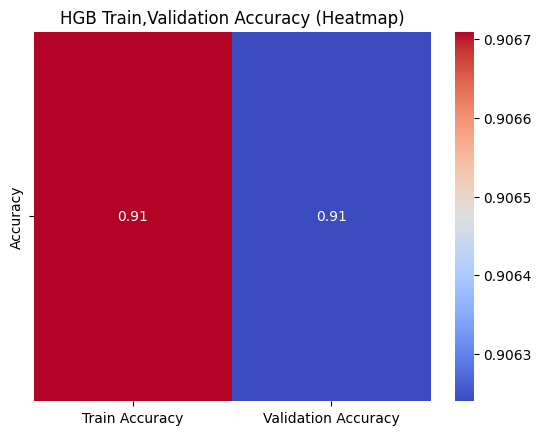

In [113]:
# 정확도를 2D 배열로 준비 (한 차원으로 두 값을 넣음)
accuracy_matrix = np.array([[train_acc, val_acc]])

# 히트맵 그리기
sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', xticklabels=['Train Accuracy', 'Validation Accuracy'], yticklabels=['Accuracy'], cbar=True)

# 그래프 설정
plt.title('HGB Train,Validation Accuracy (Heatmap)')

plt.savefig('/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu/code/Users/tmxhs85/HGB_accuracy.png')